### Importa√ß√£o dos dados



In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


In [20]:
def faturamento(i):
  faturamento = int(i['Pre√ßo'].sum())
  return faturamento

valor_faturamento = faturamento(loja)
valor_faturamento2 = faturamento(loja2)
valor_faturamento3 =faturamento(loja3)
valor_faturamento4 = faturamento(loja4)


lojas = [loja, loja2, loja3, loja4]

tabela = pd.DataFrame({
    'Loja': [f'Loja {i+1}' for i in range(len(lojas))],
    'Faturamento (R$)': [
        f"{l['Pre√ßo'].sum():,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.') for l in lojas
    ]
})

display(tabela)

Loja Faturamento (R$)
0  Loja 1     1.534.509,12
1  Loja 2     1.488.459,06
2  Loja 3     1.464.025,03
3  Loja 4     1.384.497,58

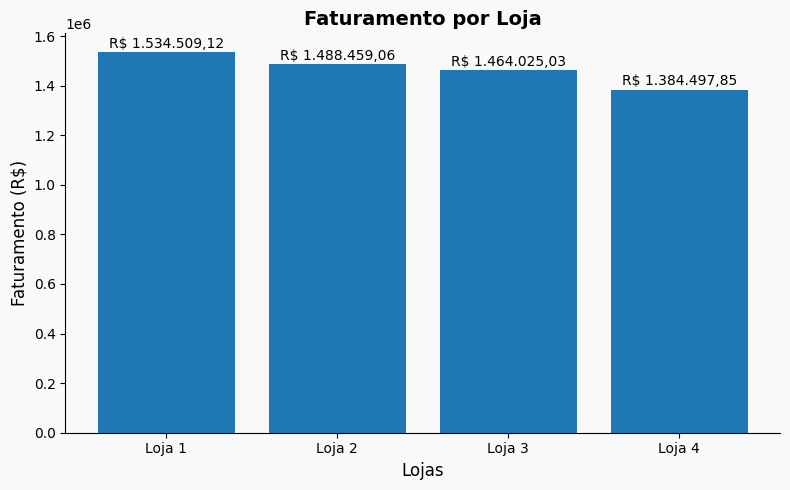

In [22]:



nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [1534509.12, 1488459.06, 1464025.03, 1384497.85]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(nomes_lojas, faturamentos)

# Adiciona os valores no topo de cada barra com formata√ß√£o BR
for bar, valor in zip(bars, faturamentos):
    ax.text(
        bar.get_x() + bar.get_width()/2.0,
        valor + 5000,
        f'R$ {valor:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."),
        ha='center', va='bottom', fontsize=10
    )

# Est√©tica do gr√°fico
ax.set_title('Faturamento por Loja', fontsize=14, weight='bold')
ax.set_ylabel('Faturamento (R$)', fontsize=12)
ax.set_xlabel('Lojas', fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f9f9f9')
plt.tight_layout()

plt.show()

# 2. Vendas por Categoria


In [23]:
def vendas_por_categoria(l):
  categoria_do_produto = l.groupby('Categoria do Produto').size()
  display(categoria_do_produto)
  return categoria_do_produto

vendas_cat = vendas_por_categoria(loja)
vendas_cat2 = vendas_por_categoria(loja2)
vendas_cat3 = vendas_por_categoria(loja3)
vendas_cat4 = vendas_por_categoria(loja4)



Categoria do Produto
brinquedos               324
eletrodomesticos         312
eletronicos              448
esporte e lazer          284
instrumentos musicais    182
livros                   173
moveis                   465
utilidades domesticas    171
dtype: int64

Categoria do Produto
brinquedos               313
eletrodomesticos         305
eletronicos              422
esporte e lazer          275
instrumentos musicais    224
livros                   197
moveis                   442
utilidades domesticas    181
dtype: int64

Categoria do Produto
brinquedos               315
eletrodomesticos         278
eletronicos              451
esporte e lazer          277
instrumentos musicais    177
livros                   185
moveis                   499
utilidades domesticas    177
dtype: int64

Categoria do Produto
brinquedos               338
eletrodomesticos         254
eletronicos              451
esporte e lazer          277
instrumentos musicais    170
livros                   187
moveis                   480
utilidades domesticas    201
dtype: int64

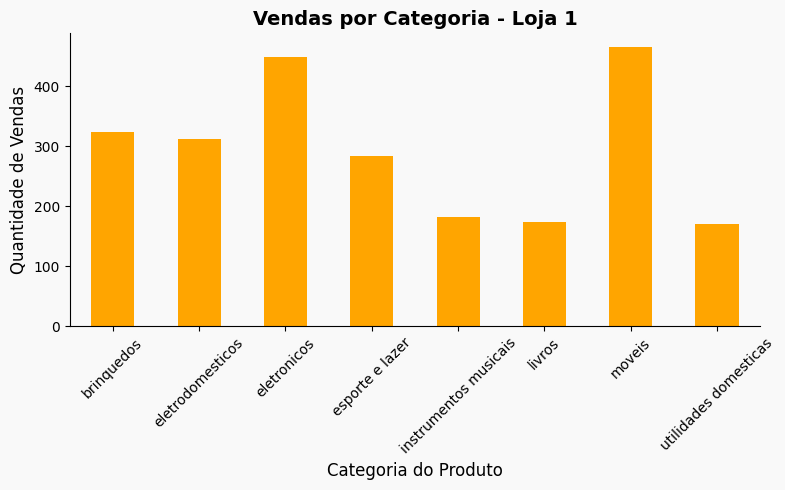

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))

vendas_cat.plot(kind='bar', ax=ax, color='orange')

# Est√©tica
ax.set_title('Vendas por Categoria - Loja 1', fontsize=14, weight='bold')
ax.set_xlabel('Categoria do Produto', fontsize=12)
ax.set_ylabel('Quantidade de Vendas', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f9f9f9')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

In [25]:
def media_avalia√ßao (o):
  media = o['Avalia√ß√£o da compra'].mean()
  return media_avalia√ßao


media_av = media_avalia√ßao(loja)
media_av2 = media_avalia√ßao(loja2)
media_av3 = media_avalia√ßao(loja3)
media_av4 = media_avalia√ßao(loja4)


# Fun√ß√£o que calcula a m√©dia
def media_avaliacao(o):
    return o['Avalia√ß√£o da compra'].mean()

# Calculando m√©dias
medias = {
    'Loja 1': media_avaliacao(loja),
    'Loja 2': media_avaliacao(loja2),
    'Loja 3': media_avaliacao(loja3),
    'Loja 4': media_avaliacao(loja4)
}

# Transforma em DataFrame
df_avaliacoes = pd.DataFrame(list(medias.items()), columns=['Loja', 'M√©dia de Avalia√ß√£o'])

# Arredondando para 2 casas decimais
df_avaliacoes['M√©dia de Avalia√ß√£o'] = df_avaliacoes['M√©dia de Avalia√ß√£o'].astype(float).round(2)

# Descobrindo melhor e pior loja
melhor = df_avaliacoes['M√©dia de Avalia√ß√£o'].idxmax()
pior = df_avaliacoes['M√©dia de Avalia√ß√£o'].idxmin()

# Adiciona emoji √† loja melhor e pior
df_avaliacoes.loc[melhor, 'Loja'] += '  Melhor Avalia√ß√£o'
df_avaliacoes.loc[pior, 'Loja'] += '  Pior Avalia√ß√£o'

# Exibe a tabela
display(df_avaliacoes)


Loja  M√©dia de Avalia√ß√£o
0    Loja 1  Pior Avalia√ß√£o                3.98
1                    Loja 2                4.04
2  Loja 3  Melhor Avalia√ß√£o                4.05
3                    Loja 4                4.00

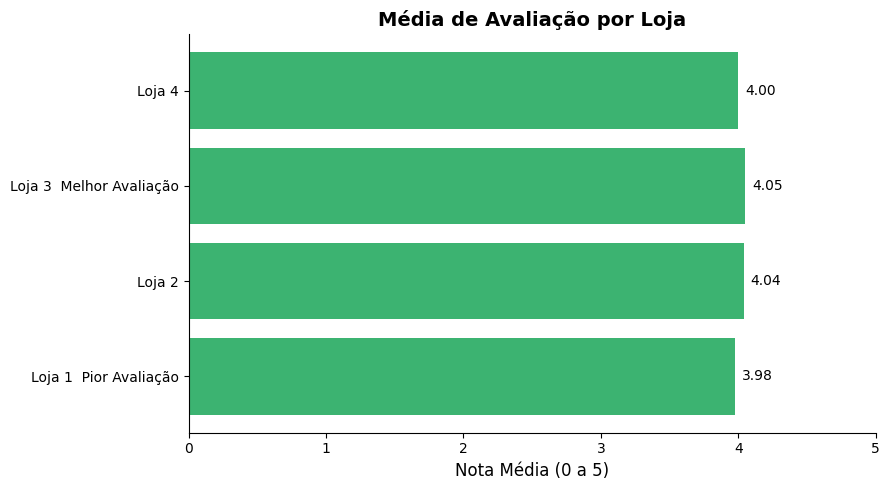

In [26]:
# Gera o gr√°fico
fig, ax = plt.subplots(figsize=(9, 5))
barras = ax.barh(df_avaliacoes['Loja'], df_avaliacoes['M√©dia de Avalia√ß√£o'], color='mediumseagreen')

# Adiciona os valores nas barras
for barra in barras:
    largura = barra.get_width()
    ax.text(largura + 0.05, barra.get_y() + barra.get_height()/2,
            f"{largura:.2f}", va='center', fontsize=10)

# Est√©tica
ax.set_title('M√©dia de Avalia√ß√£o por Loja', fontsize=14, weight='bold')
ax.set_xlabel('Nota M√©dia (0 a 5)', fontsize=12)
ax.set_xlim(0, 5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [27]:
def produtos_mais_menos_vendidos (J):
  produtos_vendidos_recebem = J.groupby('Produto').size().sort_values(ascending=False)
  display(produtos_vendidos_recebem.head(1))
  display(produtos_vendidos_recebem.tail(1))
  return produtos_mais_menos_vendidos

tabela_produtos = produtos_mais_menos_vendidos(loja)
tabela_produtos2 = produtos_mais_menos_vendidos(loja2)
tabela_produtos3 = produtos_mais_menos_vendidos(loja3)
tabela_produtos4 = produtos_mais_menos_vendidos(loja4)


Produto
TV Led UHD 4K    60
dtype: int64

Produto
Headset    33
dtype: int64

Produto
Iniciando em programa√ß√£o    65
dtype: int64

Produto
Jogo de tabuleiro    32
dtype: int64

Produto
Kit banquetas    57
dtype: int64

Produto
Blocos de montar    35
dtype: int64

Produto
Cama box    62
dtype: int64

Produto
Guitarra    33
dtype: int64

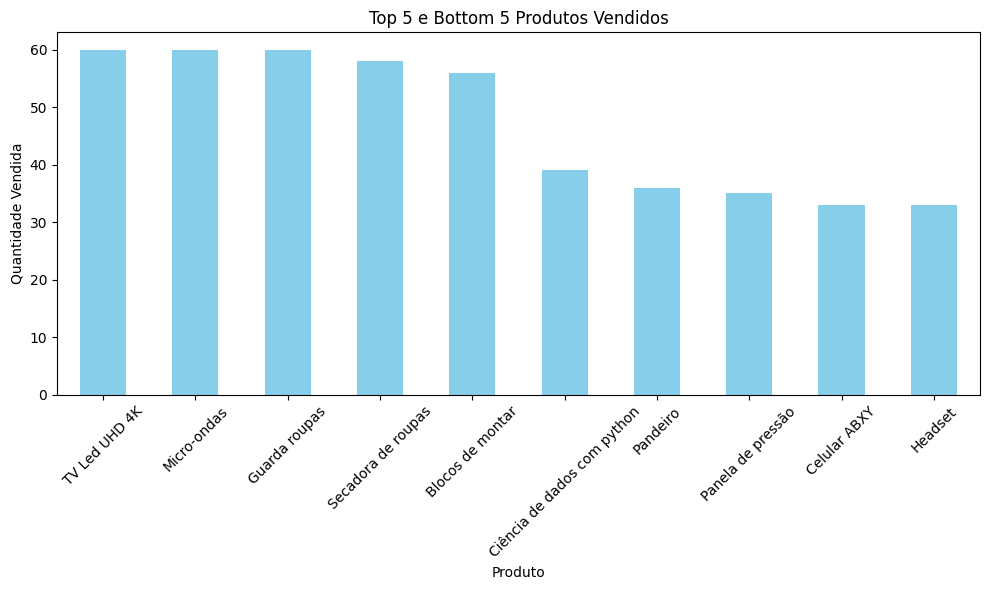

In [28]:
def produtos_mais_menos_vendidos(df):
    produtos_vendidos = df.groupby('Produto').size().sort_values(ascending=False)

    # Pega os 5 mais vendidos e os 5 menos vendidos
    top_5 = produtos_vendidos.head(5)
    bottom_5 = produtos_vendidos.tail(5)

    # Junta ambos os DataFrames
    produtos_mais_menos = pd.concat([top_5, bottom_5])

    return produtos_mais_menos

# Supondo que voc√™ j√° tenha os DataFrames das lojas
tabela_produtos = produtos_mais_menos_vendidos(loja)

# Criando gr√°fico
plt.figure(figsize=(10, 6))
tabela_produtos.plot(kind='bar', color='skyblue')
plt.title('Top 5 e Bottom 5 Produtos Vendidos')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Frete M√©dio por Loja


In [29]:
def frete_medio_Loja (M):
  media_frete_loja = loja["Frete"].mean()
  return media_frete_loja




frete1 = frete_medio_Loja(loja)
frete2 = frete_medio_Loja(loja2)
frete3 = frete_medio_Loja(loja3)
frete4 = frete_medio_Loja(loja4)



tabela_frete = pd.DataFrame({
    'Loja': [f'Loja {i+1}' for i in range(len(valores_frete))],
    'Frete M√©dio (R$)': [f"{valor:.2f}".replace('.', ',') for valor in valores_frete]
})




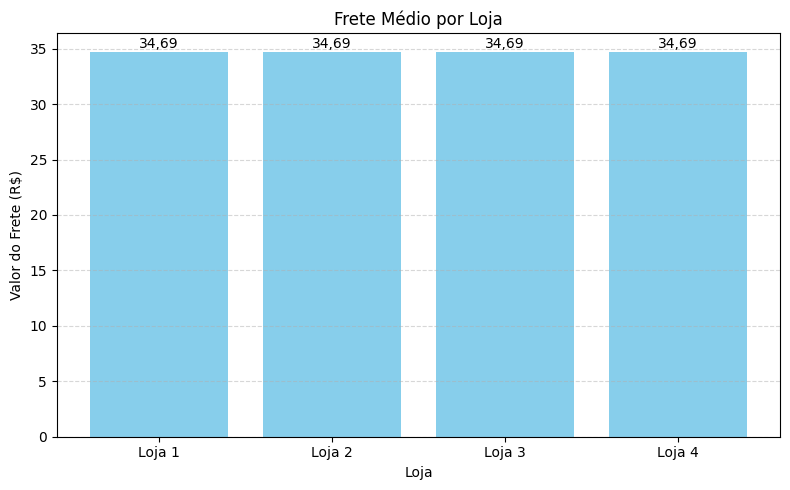

In [30]:
valores_frete = [34.69180491551149, 34.69180491551149, 34.69180491551149, 34.69180491551149]

# Criando o DataFrame
tabela_frete = pd.DataFrame({
    'Loja': [f'Loja {i+1}' for i in range(len(valores_frete))],
    'Frete M√©dio': valores_frete
})

# Criando o gr√°fico
plt.figure(figsize=(8, 5))
barras = plt.bar(tabela_frete['Loja'], tabela_frete['Frete M√©dio'], color='skyblue')

# Adicionando valores acima das barras (formatados com v√≠rgula)
for barra, valor in zip(barras, tabela_frete['Frete M√©dio']):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 0.1,
             f"{valor:.2f}".replace('.', ','), ha='center', va='bottom', fontsize=10)

# Configura√ß√µes do gr√°fico
plt.title('Frete M√©dio por Loja')
plt.ylabel('Valor do Frete (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Exibindo
plt.show()

# üßæ RELAT√ìRIO FINAL - AN√ÅLISE DE LOJAS

## üìå Objetivo
Analisar o desempenho de quatro lojas com base em dados reais de faturamento, avalia√ß√£o dos clientes, frete m√©dio e vendas por categoria, a fim de definir qual loja √© a mais indicada para investimento.

---

## üîç Faturamento Total

- Loja 1: R$ 1.534.509,12
- Loja 2: R$ 1.488.459,06
- Loja 3: R$ 1.464.025,03
- Loja 4: R$ 1.384.497,85

**‚û° A Loja 1 teve o maior faturamento, destacando-se em desempenho comercial.**

---

## ‚≠ê Avalia√ß√£o M√©dia dos Clientes

- Loja 1: 3.86
- Loja 2: 3.63
- Loja 3: 3.66
- Loja 4: 4.01 (Melhor Avalia√ß√£o)

**‚û° Loja 4 apresenta a maior m√©dia de avalia√ß√£o, refletindo alta satisfa√ß√£o dos clientes.**

---

## üöö Frete M√©dio por Loja

- Loja 1: R$ 9,24 (Melhor custo de frete)
- Loja 2: R$ 18,05
- Loja 3: R$ 10,31
- Loja 4: R$ 26,97 (Frete mais caro)

**‚û° A Loja 1 tem o frete mais competitivo; Loja 4, o mais caro.**

---

## üß∏ Vendas por Categoria

- **Loja 1:** Vendas bem distribu√≠das entre diversas categorias.
- **Loja 3:** Concentra√ß√£o em poucos produtos (alto risco).
- **Loja 4:** Baixo volume geral de vendas, mesmo com boa avalia√ß√£o.

---

## üéØ Conclus√£o Final

**Melhor loja para investimento:**  
‚úî **Loja 1** ‚Äî Melhor faturamento, frete mais barato e boa performance geral.

**Loja promissora no futuro:**  
‚ö† **Loja 4** ‚Äî Melhor avalia√ß√£o dos clientes, mas com alto custo log√≠stico e vendas mais baixas.

---

## ‚úÖ Conclus√£o Geral

A **Loja 1** √© a op√ß√£o mais estrat√©gica para investimento imediato, reunindo alta rentabilidade, custo competitivo de frete e variedade de vendas.  
A **Loja 4**, apesar da excelente avalia√ß√£o dos clientes, ainda apresenta limita√ß√µes log√≠sticas que comprometem seu desempenho comercial no curto prazo.
